In [7]:
import os
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

from IPython.display import display
from tqdm import tqdm

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

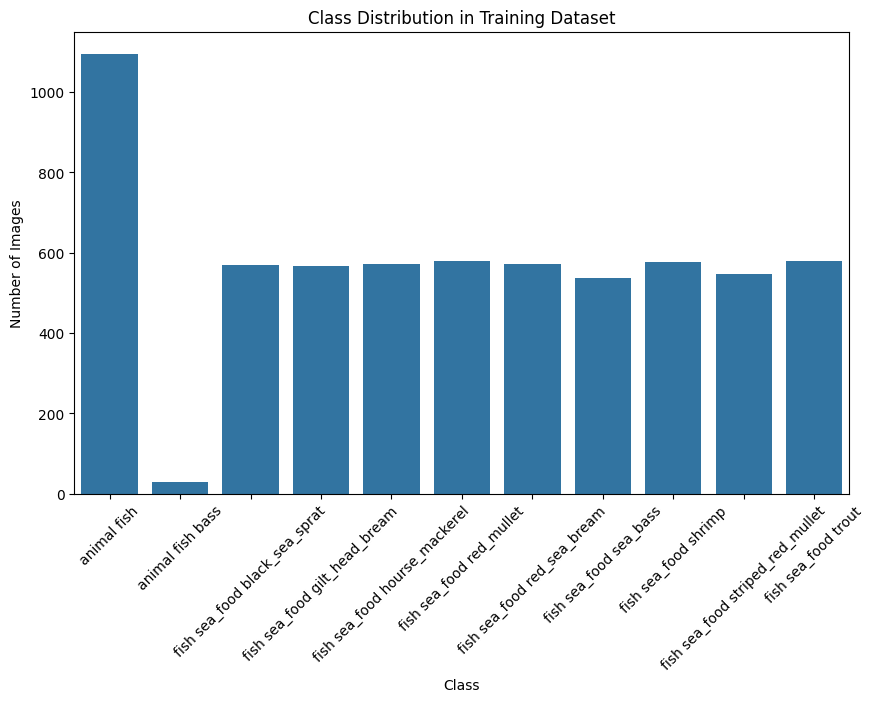

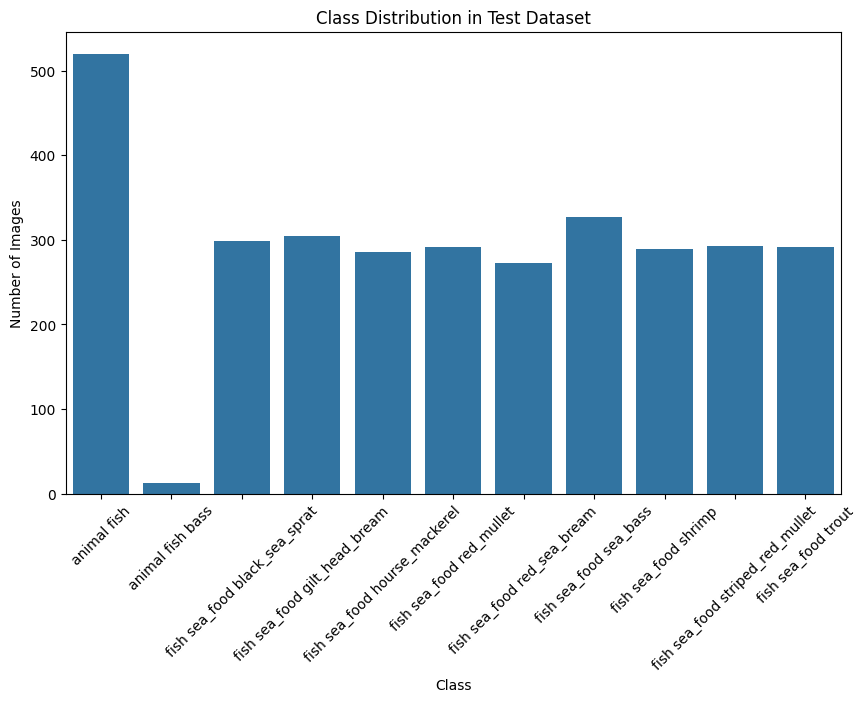

In [8]:
data_path =r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train'
class_counts = {}
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()

data_path= r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test'
class_counts = {}
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))
# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel('Class') 
plt.ylabel('Number of Images')
plt.title('Class Distribution in Test Dataset')
plt.xticks(rotation=45)
plt.show()


In [9]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(degrees=0, scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [10]:
#train dataset and dataloader
train_data_path = r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train'
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
#test dataset and dataloader
test_data_path = r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)
#val dataset and dataloader
val_data_path = r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val'
val_dataset = datasets.ImageFolder(root=val_data_path, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)


In [6]:
print(train_dataset.class_to_idx)

{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [7]:
class_df=pd.DataFrame(list(train_dataset.class_to_idx.items()), columns=['Class Name', 'Class Index'])
class_df

,Class Name,Class Index
0,animal fish,0
1,animal fish bass,1
2,fish sea_food black_sea_sprat,2
3,fish sea_food gilt_head_bream,3
4,fish sea_food hourse_mackerel,4
5,fish sea_food red_mullet,5
6,fish sea_food red_sea_bream,6
7,fish sea_food sea_bass,7
8,fish sea_food shrimp,8
9,fish sea_food striped_red_mullet,9


In [8]:
#cnn model
class cnn(nn.Module):
    def __init__(self):
        super().__init__()
        #convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        #fully connected layer
        self.fc1 =nn.Linear(in_features = 64*56*56, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=11)

    def forward(self, x):
        cl1 = self.pool(torch.relu(self.conv1(x)))
        cl2 = self.pool(torch.relu(self.conv2(cl1)))
        flatten_layer = cl2.view(cl2.size(0), -1)
        fully_connected1 = torch.relu(self.fc1(flatten_layer))
        fully_connected2 = self.fc2(fully_connected1)
        return fully_connected2

In [9]:
model=cnn()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
epochs = 20
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    

Using device: cpu
Epoch 1/20, Loss: 1.4203
Epoch 2/20, Loss: 1.7412
Epoch 3/20, Loss: 0.8360
Epoch 4/20, Loss: 0.6524
Epoch 5/20, Loss: 0.4924
Epoch 6/20, Loss: 0.4923
Epoch 7/20, Loss: 0.2476
Epoch 8/20, Loss: 0.0318
Epoch 9/20, Loss: 0.2131
Epoch 10/20, Loss: 0.2115
Epoch 11/20, Loss: 0.7777
Epoch 12/20, Loss: 0.2902
Epoch 13/20, Loss: 0.0679
Epoch 14/20, Loss: 0.3995
Epoch 15/20, Loss: 0.2100
Epoch 16/20, Loss: 0.1129
Epoch 17/20, Loss: 0.0070
Epoch 18/20, Loss: 0.1934
Epoch 19/20, Loss: 0.0561
Epoch 20/20, Loss: 0.1135


In [11]:
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")    
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9473
Precision: 0.9518
Recall: 0.9473
F1 Score: 0.9486
Confusion Matrix:
[[461  23   8   7   4   4   1   3   1   2   6]
 [  9   4   0   0   0   0   0   0   0   0   0]
 [  0   0 295   0   2   0   0   1   0   0   0]
 [  1   0   0 283   4   0  11   6   0   0   0]
 [  0   0   1   0 285   0   0   0   0   0   0]
 [  0   0   0   0   0 291   0   0   0   0   0]
 [  0   0   0   1   0   0 266   2   0   0   4]
 [  1   0  18   5   3   0   2 296   0   2   0]
 [  0   0   0   0   0   1   0   0 286   2   0]
 [  1   0   5   1   5   2   3   2   4 269   1]
 [  1   0   1   3   3   0   0   1   0   0 283]]


In [12]:
# torch.save(model.state_dict(), 'cnn_fish_model.pth')
# print("Model saved to cnn_fish_model.pth")

In [13]:
class_names = [
    'animal fish',
    'animal fish bass',
    'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream',
    'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet',
    'fish sea_food red_sea_bream',
    'fish sea_food sea_bass',
    'fish sea_food shrimp',
    'fish sea_food striped_red_mullet',
    'fish sea_food trout'
]

model.load_state_dict(torch.load('cnn_fish_model.pth',map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def predict_image(img_path):
    image = Image.open(img_path).convert('RGB')
    display(image)  # Show the image

    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted_idx = torch.max(output, 1)

    predicted_class = class_names[predicted_idx.item()]
    print(f"\nPredicted Class: {predicted_class}")
    return predicted_class

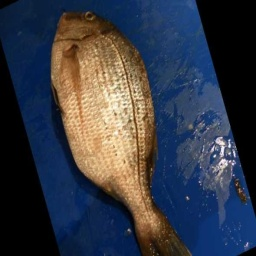


Predicted Class: fish sea_food red_sea_bream


'fish sea_food red_sea_bream'

In [14]:
path=r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test\fish sea_food red_sea_bream\0VGY5JQ9IFS5.jpg'
predict_image(path)


In [11]:
#uses pretrained model
vgg16=models.vgg16(pretrained=True)
for param in vgg16.parameters():
    param.requires_grad=False
num_features=vgg16.classifier[6].in_features
vgg16.classifier[6]=nn.Linear(num_features,11)



In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

vgg16 = vgg16.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier[6].parameters(), lr=0.001)

Using device: cpu


In [16]:
epochs = 5
for epoch in range(epochs):
    vgg16.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss: {running_loss/len(train_loader):.4f}")

print("✅ Training Completed Successfully!")

Epoch [1/5]  Loss: 0.5144
Epoch [2/5]  Loss: 0.2620
Epoch [3/5]  Loss: 0.2125
Epoch [4/5]  Loss: 0.1998
Epoch [5/5]  Loss: 0.2026
✅ Training Completed Successfully!


In [17]:
vgg16.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"🎯 Test Accuracy: {accuracy:.2f}%")


🎯 Test Accuracy: 95.76%


In [18]:
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9627
Precision: 0.9640
Recall: 0.9627
F1 Score: 0.9629
Confusion Matrix:
[[498   5   0   2   0   5   0   3   0   2   5]
 [  3  10   0   0   0   0   0   0   0   0   0]
 [  0   0 290   0   0   0   0   1   1   6   0]
 [  0   0   0 295   0   0   4   6   0   0   0]
 [  0   0   7   1 262   0   3   2   0  11   0]
 [  0   0   0   0   0 288   0   0   0   3   0]
 [  0   0   0   4   0   0 269   0   0   0   0]
 [  0   0   1   5   2   0   0 308   0   7   4]
 [  0   0   0   0   0   0   0   0 279  10   0]
 [  0   0   1   0   0   7   0   0   3 282   0]
 [  0   0   0   3   0   0   0   2   0   0 287]]


In [20]:
torch.save(vgg16.state_dict(), 'vgg16_fish_model.pth')


In [21]:
class_names = [
    'animal fish',
    'animal fish bass',
    'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream',
    'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet',
    'fish sea_food red_sea_bream',
    'fish sea_food sea_bass',
    'fish sea_food shrimp',
    'fish sea_food striped_red_mullet',
    'fish sea_food trout'
]

vgg16.load_state_dict(torch.load('vgg16_fish_model.pth',map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
vgg16.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16.to(device)
def predict_image_vgg16(img_path):
    image = Image.open(img_path).convert('RGB')
    display(image)  # Show the image

    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = vgg16(input_tensor)
        _, predicted_idx = torch.max(output, 1)

    predicted_class = class_names[predicted_idx.item()]
    print(f"\nPredicted Class: {predicted_class}")
    return predicted_class


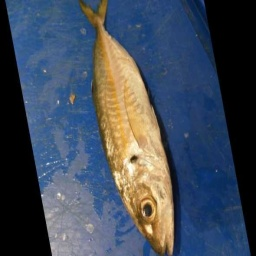


Predicted Class: fish sea_food hourse_mackerel


'fish sea_food hourse_mackerel'

In [23]:
path=r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val\fish sea_food hourse_mackerel\2IO5GERCRXSR.jpg'
predict_image_vgg16(path)

In [ ]:
# class vg16_model(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.vgg16=vg16
#     def forward(self,x):
#         return self.vgg16(x)
# model=vg16_model()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

# model.to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.vgg16.classifier[6].parameters(), lr = 0.001)



Using device: cpu


In [ ]:
# epochs = 20
# for epoch in range(epochs):
#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         output = model(images)
#         loss = criterion(output, labels)
#         loss.backward()
#         optimizer.step()
#     print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


In [36]:
densenet=models.densenet121(pretrained=True)
for param in densenet.parameters():
    param.requires_grad=False
num_features=densenet.classifier.in_features
densenet.classifier=nn.Linear(num_features,11)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\DEVA NANTHAN/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:08<00:00, 3.70MB/s]


Using device: cpu


In [ ]:
model = densenet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)


In [37]:
epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}]  Loss: {running_loss/len(train_loader):.4f}")
    

Epoch [1/3]  Loss: 0.1395
Epoch [2/3]  Loss: 0.1375
Epoch [3/3]  Loss: 0.1388


In [38]:
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')    
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.1462
Precision: 0.1583
Recall: 0.1462
F1 Score: 0.1408
Confusion Matrix:
[[162   0  61  63  33  17  37  63  18  47  19]
 [  8   0   0   0   0   1   0   1   0   0   3]
 [ 84   0  28  37  18  15  21  25  11  43  16]
 [ 91   0  23  42  14   6  18  37  19  42  13]
 [ 97   0  27  21  27   6   7  27  16  45  13]
 [ 86   0  23  31  28  32   5  22   8  34  22]
 [ 95   0  18  37  19   4  28  34   7  24   7]
 [ 89   0  32  40  18   7  21  46  12  40  22]
 [110   0  23  22  18   2   5  34  33  34   8]
 [ 89   0  31  37  20  17   7  27  20  39   6]
 [ 94   0  21  37  21   3  12  26  11  38  29]]


In [39]:
torch.save(model.state_dict(), 'densenet_fish_model.pth')

In [43]:
class_names = [
    'animal fish',  
    'animal fish bass',
    'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream',
    'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet',
    'fish sea_food red_sea_bream',
    'fish sea_food sea_bass',
    'fish sea_food shrimp',
    'fish sea_food striped_red_mullet',
    'fish sea_food trout'
]   
state_dict = torch.load('densenet_fish_model.pth', map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
densenet.load_state_dict(state_dict, strict=False)
densenet.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
densenet.to(device)
def predict_image_densenet(img_path):
    image = Image.open(img_path).convert('RGB')
    display(image)  # Show the image

    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = densenet(input_tensor)
        _, predicted_idx = torch.max(output, 1)

    predicted_class = class_names[predicted_idx.item()]
    print(f"\nPredicted Class: {predicted_class}")
    return predicted_class



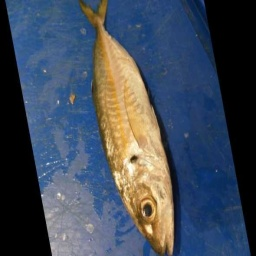


Predicted Class: fish sea_food hourse_mackerel


'fish sea_food hourse_mackerel'

In [44]:
path=r'C:\Users\DEVA NANTHAN\Documents\fish\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val\fish sea_food hourse_mackerel\2IO5GERCRXSR.jpg'
predict_image_densenet(path)

In [ ]:
resnet50 = models.resnet50(pretrained=True)


for name, param in resnet50.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True   
    else:
        param.requires_grad = False  


num_features = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_features, 11)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
resnet50 = resnet50.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, resnet50.parameters()), lr=0.01)


epochs = 5
for epoch in range(epochs):
    resnet50.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet50(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f}")


resnet50.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Using device: cpu
Epoch [1/5] Loss: 0.7417
Epoch [2/5] Loss: 0.0684
Epoch [3/5] Loss: 0.0412
Epoch [4/5] Loss: 0.0309
Epoch [5/5] Loss: 0.0119
Accuracy: 0.9922
Precision: 0.9922
Recall: 0.9922
F1 Score: 0.9919
Confusion Matrix:
[[519   1   0   0   0   0   0   0   0   0   0]
 [  6   7   0   0   0   0   0   0   0   0   0]
 [  0   0 290   0   1   0   0   7   0   0   0]
 [  0   0   0 296   0   0   0   9   0   0   0]
 [  0   0   0   0 286   0   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   1   0]
 [  0   0   0   0   0   0 273   0   0   0   0]
 [  0   0   0   0   0   0   0 327   0   0   0]
 [  0   0   0   0   0   0   0   0 289   0   0]
 [  0   0   0   0   0   0   0   0   0 293   0]
 [  0   0   0   0   0   0   0   0   0   0 292]]


In [6]:
torch.save(resnet50.state_dict(), 'resnet50_fish_model1.pth')

In [11]:
mobile_net = models.mobilenet_v2(pretrained=True)


In [12]:
for name, param in mobile_net.named_parameters():
    if "features.16" in name or "features.17" in name or "classifier" in name:
        param.requires_grad = True   # fine-tune last layers
    else:
        param.requires_grad = False  # freeze earlier layers



In [13]:
num_features = mobile_net.classifier[1].in_features
mobile_net.classifier[1] = nn.Linear(num_features, 11)


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = mobile_net.to(device)


Using device: cpu


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01)


In [16]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5] Loss: 0.4739
Epoch [2/5] Loss: 0.1248
Epoch [3/5] Loss: 0.0941
Epoch [4/5] Loss: 0.0689
Epoch [5/5] Loss: 0.0701


In [17]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9831
Precision: 0.9832
Recall: 0.9831
F1 Score: 0.9828
Confusion Matrix:
[[509   2   0   1   0   7   0   0   1   0   0]
 [  7   6   0   0   0   0   0   0   0   0   0]
 [  0   0 295   0   3   0   0   0   0   0   0]
 [  0   0   0 299   0   0   2   4   0   0   0]
 [  0   0   0   0 286   0   0   0   0   0   0]
 [  0   0   0   0   0 291   0   0   0   0   0]
 [  0   0   0   1   0   0 271   1   0   0   0]
 [  0   0   0   1   0   0   0 326   0   0   0]
 [  0   0   0   0   0   0   0   0 287   2   0]
 [  0   0   0   0   0  15   0   0   0 278   0]
 [  0   0   0   2   0   0   0   5   0   0 285]]


In [18]:
torch.save(mobile_net.state_dict(), 'mobile_net1.pth')

In [20]:
densenet = models.densenet121(pretrained=True)


for name, param in densenet.named_parameters():
    if "denseblock4" in name or "norm5" in name or "classifier" in name:
        param.requires_grad = True   
    else:
        param.requires_grad = False  


num_features = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_features, 11)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = densenet.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

Using device: cpu


In [21]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/5] Loss: 0.6160
Epoch [2/5] Loss: 0.0884
Epoch [3/5] Loss: 0.0423
Epoch [4/5] Loss: 0.0268
Epoch [5/5] Loss: 0.0152


In [22]:
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9978
Precision: 0.9978
Recall: 0.9978
F1 Score: 0.9978
Confusion Matrix:
[[518   2   0   0   0   0   0   0   0   0   0]
 [  3  10   0   0   0   0   0   0   0   0   0]
 [  0   0 298   0   0   0   0   0   0   0   0]
 [  0   0   0 304   0   0   1   0   0   0   0]
 [  0   0   0   0 286   0   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   1   0]
 [  0   0   0   0   0   0 273   0   0   0   0]
 [  0   0   0   0   0   0   0 327   0   0   0]
 [  0   0   0   0   0   0   0   0 289   0   0]
 [  0   0   0   0   0   0   0   0   0 293   0]
 [  0   0   0   0   0   0   0   0   0   0 292]]


In [23]:
torch.save(densenet.state_dict(), 'densenet1.pth')